108.17711839611701
79.6718423898408


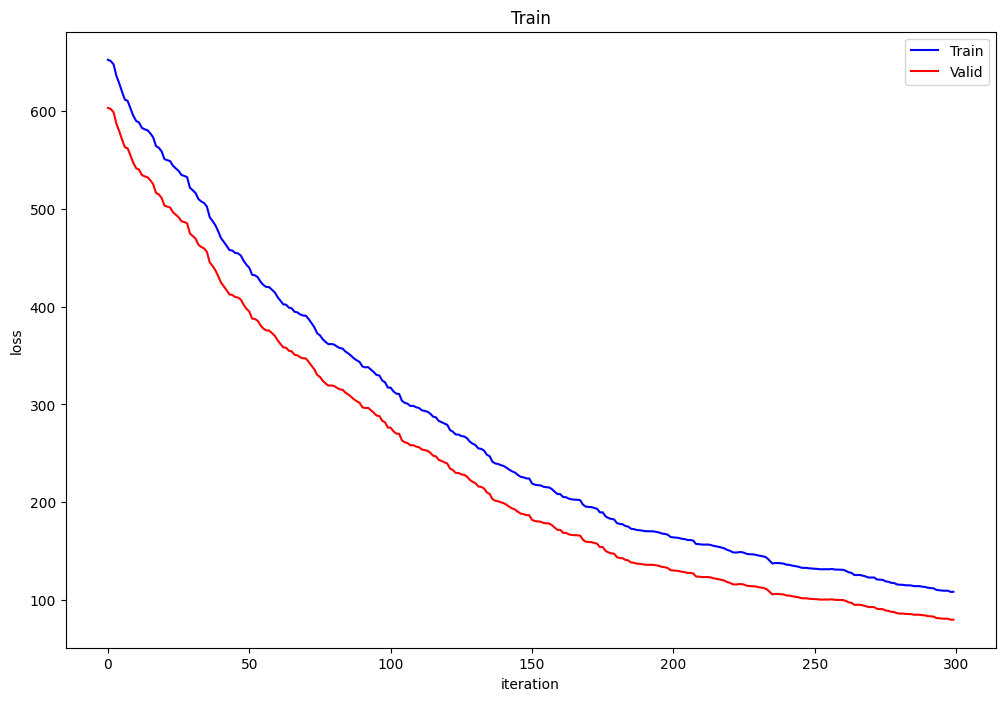

23.243439651118926
19.055717345499204


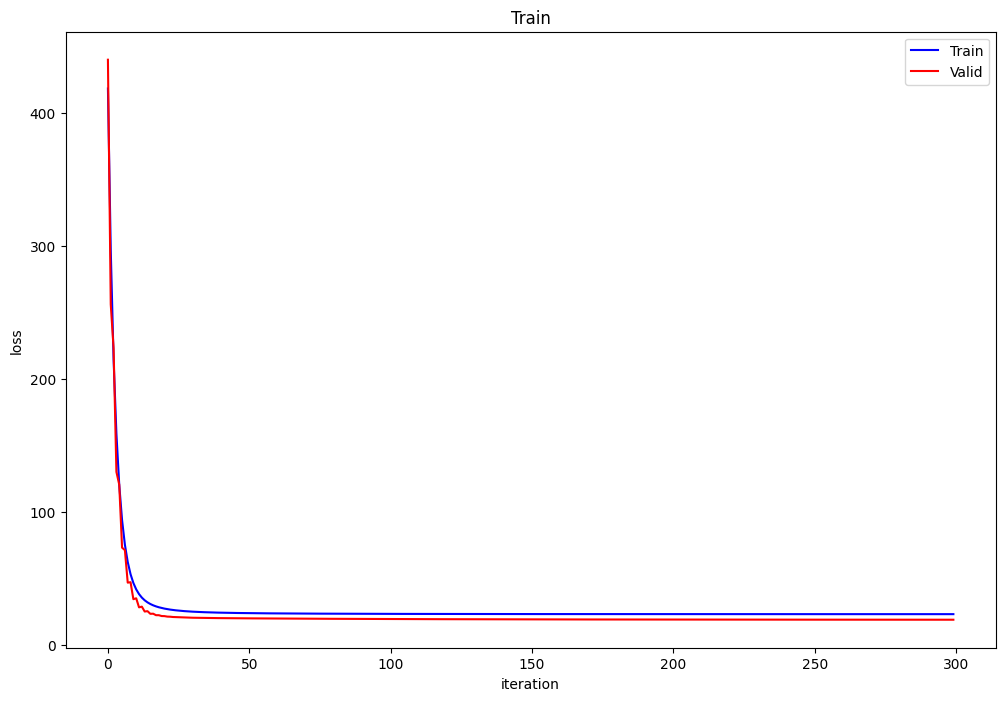

22.198837412116337
21.33874786441705


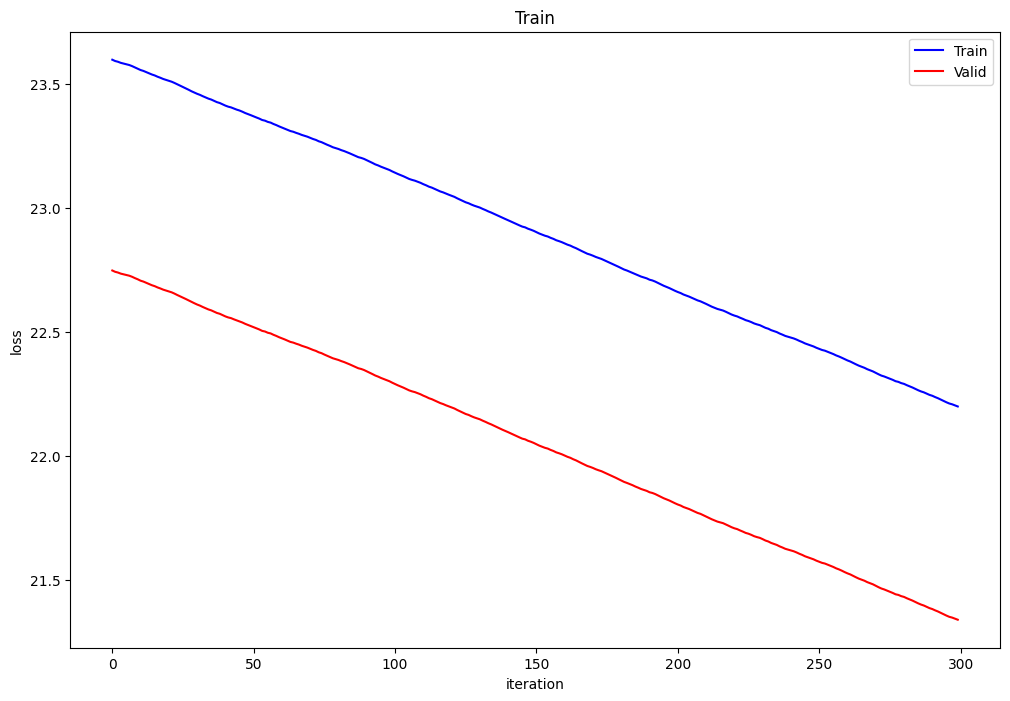

3.293515612623955
3.0867384728536065


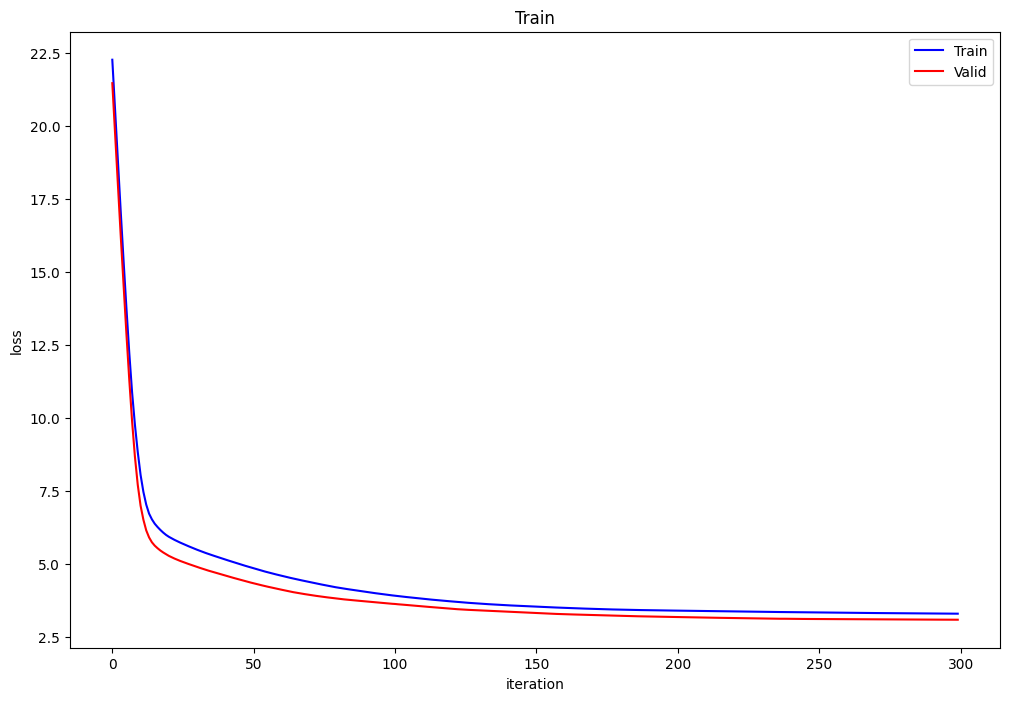

In [2]:
import numpy as np
import pandas as pd
import sklearn.datasets as sd
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import math
import random

# 读取实验数据
x,y = sd.load_svmlight_file('../data/housing_scale.txt',n_features = 13)

# 分割数据集为训练集和验证集
x_train, x_valid, y_train, y_valid = sms.train_test_split(x, y)

# 将稀疏矩阵转为ndarray类型
x_train = x_train.toarray()
x_valid = x_valid.toarray()
y_train = y_train.reshape(len(y_train),1)
y_valid = y_valid.reshape(len(y_valid),1)#转化为1列

x_train = np.concatenate((np.ones((x_train.shape[0],1)), x_train), axis = 1)
x_valid = np.concatenate((np.ones((x_valid.shape[0],1)), x_valid), axis = 1)

# 均方误差损失函数
def mean_squared_error(X, y, theta):
    hx = X.dot(theta)#w点乘X
    error = np.power((hx - y), 2).mean()
    return error

# 均方误差的梯度函数
def mean_squared_gradient(X, y, theta):
    return X.T.dot(X.dot(theta) - y)

# 平均绝对误差
def mean_absolute_error(X, y, theta):
    hx = X.dot(theta)#w点乘X
    return np.mean(np.abs(hx - y))

# 平均绝对误差的梯度函数
def mean_absolute_gradient(X, y, theta):
    return X.T.dot(np.sign(X.dot(theta) - y))

# 定义梯度下降框架
class Linear_gradient_descent:
    def __init__(self,x_train,x_valid,y_train,y_valid,loss_func,gradient):
        self.x_train = x_train
        self.x_valid = x_valid
        self.y_train = y_train
        self.y_valid = y_valid
        self.loss_func = loss_func
        self.gradient = gradient
        self.theta = 0 # 初始化
        self.loss_train = []
        self.loss_valid = []
        
    # 线性模型参数初始化
    def init_params(self, mode="zero"):
        if mode == "zero": # 零初始化
            self.theta = np.zeros((self.x_train.shape[1],1))
        elif mode == "normal": # 正态分布初始化
            self.theta = np.random.normal(0,1,(self.x_train.shape[1],1))
        elif mode == "random": # 随机初始化
            self.theta = np.random.rand(self.x_train.shape[1],1)
                                  
    #随机梯度下降
    def random_descent(self, alpha, iters):
        n=self.x_train.shape
        self.loss_train = np.zeros((iters,1))
        self.loss_valid = np.zeros((iters,1))
        for i in range(iters):
            #随机选择一个样本
            num=np.random.randint(n,size=1)
            x_select=self.x_train[num,:]
            y_select=self.y_train[num,0]
            grad = self.gradient(x_select, y_select, self.theta)
            self.theta = self.theta - alpha * grad
            self.loss_train[i] = self.loss_func(self.x_train, self.y_train, self.theta)
            self.loss_valid[i] = self.loss_func(self.x_valid, self.y_valid, self.theta)
        return self.theta, self.loss_train, self.loss_valid

    #全梯度下降
    def descent(self, alpha, iters):
        self.loss_train = np.zeros((iters,1))
        self.loss_valid = np.zeros((iters,1))
        for i in range(iters):
            grad = self.gradient(self.x_train, self.y_train, self.theta)
            self.theta = self.theta - alpha * grad
            self.loss_train[i] = self.loss_func(self.x_train, self.y_train, self.theta)
            self.loss_valid[i] = self.loss_func(self.x_valid, self.y_valid, self.theta)
        return self.theta, self.loss_train, self.loss_valid
    
    # 输出最小loss并且画图
    def getLoss_and_plot(self, iters):
        print(self.loss_train.min())
        print(self.loss_valid.min())
        iteration = np.arange(0, iters, step = 1)
        fig, ax = plt.subplots(figsize = (12,8))
        ax.set_title('Train')
        ax.set_xlabel('iteration')
        ax.set_ylabel('loss')
        plt.plot(iteration, self.loss_train, 'b', label='Train')
        plt.plot(iteration, self.loss_valid, 'r', label='Valid')
        plt.legend()
        plt.show()
        
mean_descent = Linear_gradient_descent(x_train,x_valid,y_train,y_valid,mean_squared_error,mean_squared_gradient)
iters = 300
alpha = 0.001
mean_descent.init_params(mode = "random")
mean_descent.random_descent(alpha,iters)
mean_descent.getLoss_and_plot(iters)
mean_descent.init_params(mode = "random")
mean_descent.descent(alpha,iters)
mean_descent.getLoss_and_plot(iters)

mean_descent = Linear_gradient_descent(x_train,x_valid,y_train,y_valid,mean_absolute_error,mean_absolute_gradient)
iters = 300
alpha = 0.001
mean_descent.init_params(mode = "random")
mean_descent.random_descent(alpha,iters)
mean_descent.getLoss_and_plot(iters)
mean_descent.init_params(mode = "random")
mean_descent.descent(alpha,iters)
mean_descent.getLoss_and_plot(iters)

0.01828020768411229
0.021875477925675492


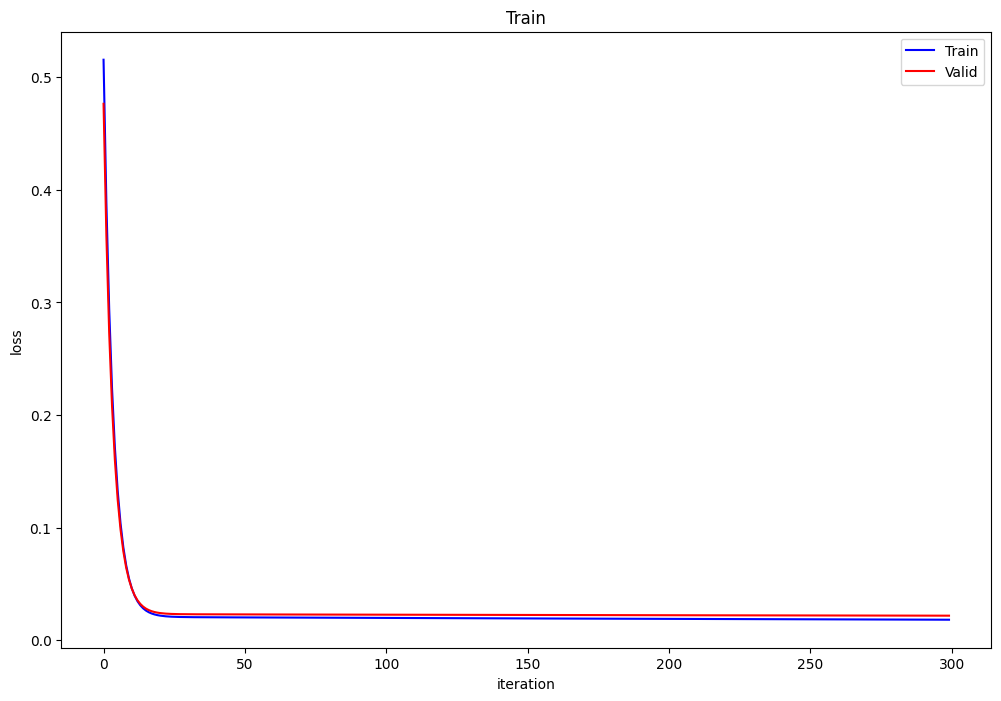

In [11]:
from sklearn.preprocessing import MinMaxScaler
# student grade
# # 选择把缺失的值填充为1
# studata_train=pd.read_csv('../data/TrainSet.csv').fillna(0)
# studata_test=pd.read_csv('../data/TestSet.csv').fillna(0)
# 选择忽略缺失的值
studata_train=pd.read_csv('../data/TrainSet.csv').dropna()
studata_test=pd.read_csv('../data/TestSet.csv').dropna()

# 这里实现了数据的归一化
scaler=MinMaxScaler(feature_range=(0, 1))
studata_train = pd.DataFrame(scaler.fit_transform(studata_train), columns=studata_train.columns)
studata_test = pd.DataFrame(scaler.fit_transform(studata_test), columns=studata_test.columns)

# 首先排除标签数据把成绩数据提取出来
x_train=studata_train.drop('Machine learning grade point',axis=1).values
# 然后单独去取标签数据
y_train=studata_train['Machine learning grade point'].values
x_test=studata_test.drop('Machine learning grade point',axis=1).values
y_test=studata_test['Machine learning grade point'].values

y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)#转化为1列

stuScore_descent = Linear_gradient_descent(x_train,x_test,y_train,y_test,mean_squared_error,mean_squared_gradient)
alpha = 0.0001
iters = 300
stuScore_descent.init_params(mode = "zero")
stuScore_descent.descent(alpha,iters)
stuScore_descent.getLoss_and_plot(iters)